In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

from keras_vggface.vggface import VGGFace
vggface = VGGFace(model = 'vgg16')

# many other models are avaiable at https://keras.io/applications/


In [3]:
print(vggface.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [4]:
from keras.engine import Model
from keras.layers import Input
from keras_vggface.vggface import VGGFace

vgg_features = VGGFace(include_top=False,
                       input_shape=(224,224,3),
                       pooling='avg')

# 'include_top' : whether to include the 3 fully-connected layers at the top of the network.
# 'include_top=False' remove the logistic regression layer 
# input_shape: only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) 
# pooling: pooling mode for feature extraction when include_top is False.
# 'avg' means that global average pooling will be applied to the output of the last convolutional layer, 
## and thus the output of the model will be a 2D tensor

In [5]:
print(vgg_features.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [6]:
# load train and test data

In [7]:
import pickle
import numpy as np
from sklearn.preprocessing import label_binarize 

In [8]:
data_train = pickle.load(open('/Users/fanyang/Documents/tensorflow_file/facedetection/image_actordata_train224.pk1', 'rb'))
data_test = pickle.load(open('/Users/fanyang/Documents/tensorflow_file/facedetection/image_actordata_test224.pk1', 'rb'))
class_list = pickle.load(open('/Users/fanyang/Documents/tensorflow_file/facedetection/class_actorlist.pk1', 'rb'))

In [9]:
X_train = np.array([x[0]/255. for x in data_train])
X_test = np.array([x[0]/255. for x in data_test])

Y_train = np.array([x[1] for x in data_train])
Y_test = np.array([x[1] for x in data_test])

In [10]:
Y_train_onehot = label_binarize(np.array([x[1] for x in data_train]), class_list)
Y_test_onehot = label_binarize(np.array([x[1] for x in data_test]), class_list)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75, 224, 224, 3)
(25, 224, 224, 3)
(75,)
(25,)


In [12]:
X_train_embedding = vgg_features.predict(X_train)
X_test_embedding = vgg_features.predict(X_test)

In [13]:
print(X_train_embedding.shape)
print(X_test_embedding.shape)

(75, 512)
(25, 512)
['JasonMomoa' 'JasonMomoa' 'JasonMomoa' 'JasonMomoa' 'JasonMomoa'
 'JasonMomoa' 'JasonMomoa' 'JasonMomoa' 'JasonMomoa' 'JasonMomoa'
 'JasonMomoa' 'JasonMomoa' 'JasonMomoa' 'JasonMomoa' 'JasonMomoa'
 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp'
 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp'
 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp' 'JohnnyDepp'
 'PatrickWilson' 'PatrickWilson' 'PatrickWilson' 'PatrickWilson'
 'PatrickWilson' 'PatrickWilson' 'PatrickWilson' 'PatrickWilson'
 'PatrickWilson' 'PatrickWilson' 'PatrickWilson' 'PatrickWilson'
 'PatrickWilson' 'PatrickWilson' 'PatrickWilson' 'RyanReynolds'
 'RyanReynolds' 'RyanReynolds' 'RyanReynolds' 'RyanReynolds'
 'RyanReynolds' 'RyanReynolds' 'RyanReynolds' 'RyanReynolds'
 'RyanReynolds' 'RyanReynolds' 'RyanReynolds' 'RyanReynolds'
 'RyanReynolds' 'RyanReynolds' 'WillemDafoe' 'WillemDafoe' 'WillemDafoe'
 'WillemDafoe' 'WillemDafoe' 'WillemDafoe' 'WillemDafoe' 'WillemDafoe

In [14]:
from sklearn.linear_model import LogisticRegression as LR

model = LR()
model.fit(X_train_embedding, Y_train)
print('training accuracy: ', model.score(X_train_embedding, Y_train))
print('test accuracy: ', model.score(X_test_embedding, Y_test))

training accuracy:  0.9866666666666667
test accuracy:  1.0


In [15]:
# use

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
# rotate image and detect face
def rotate_image_without_crop(image, angle):
    
    (h, w) = image.shape[:2]
    (cX, cY) = (w / 2., h / 2.)
 
    M = cv.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    return cv.warpAffine(image, M, (nW, nH))

def crop_image(img, faceR):
    (x, y, w, h) = faceR
    return img[y:y+h, x:x+w].copy()

def detect_face(image):
#     cascadePath = os.path.join(cv.data.haarcascades, "haarcascade_frontalface_default.xml")

    cascadePath = os.path.join(cv.data.haarcascades, "haarcascade_frontalface_alt.xml")
    result = None
    imageGray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    cascade = cv.CascadeClassifier(cascadePath)
    
    angle_range = np.arange(-60, 60, 5)
    
    best_face = None
    best_angle = None
    max_weight = 0
    for angle in angle_range:
        imageGray_rotated = rotate_image_without_crop(imageGray, angle)
        # there may be multiple faces in a pic
        faceRects, rejectLevels, levelWeights = cascade.detectMultiScale3(imageGray_rotated, scaleFactor=1.05, minNeighbors=3, minSize=(5,5), outputRejectLevels=True)
    
        if len(faceRects) <= 0:
            continue
        else:
            # for all the faces detected in a pic, find the largest shape one. It is our assumption
            # when doing prediciton, it is of course not a problem to do multiple face detection
            # but in training, it is hard to believe there are two faces of the same person.
            face, weight = max([(faceR, weight) for faceR, weight in zip(faceRects, levelWeights)], key = lambda x: x[0][2]*x[0][3]) 
#             print weight, angle
            if (weight > max_weight):
                max_weight = weight
                best_face = face
                best_angle = angle
    
    if(best_face is None):
        return None
    else:
        rotated_img = rotate_image_without_crop(image, best_angle)
        return crop_image(rotated_img, best_face)

In [18]:
# load test image

test_image = cv.imread('/Users/fanyang/Documents/tensorflow_file/facedetection/xujinliang/images (2).jpg')

In [19]:
print(test_image.shape)

(275, 183, 3)


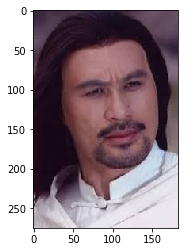

In [20]:
plt.imshow(test_image[:,:,::-1])
plt.show()

In [21]:
detect_face = detect_face(test_image)

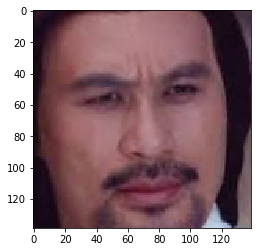

In [22]:
plt.imshow(detect_face[:,:,::-1])
plt.show()

In [23]:
detect_face_resized = cv.resize(detect_face/255., (224, 224))

In [24]:
detect_face_embedding = vgg_features.predict(np.expand_dims(detect_face_resized, axis=0))
print(list(zip(class_list, model.predict_proba(detect_face_embedding)[0])))
print(model.predict(detect_face_embedding))

[('JasonMomoa', 0.2749170069648993), ('JohnnyDepp', 0.21140279058109748), ('PatrickWilson', 0.18327609376263782), ('RyanReynolds', 0.17840708174548517), ('WillemDafoe', 0.1519970269458803)]
['JasonMomoa']


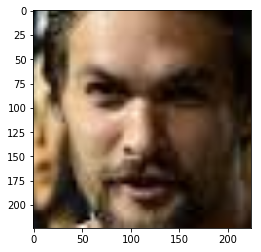

In [25]:
JasonMomoa = X_train[Y_train == "JasonMomoa"]

plt.imshow(JasonMomoa[0][:,:,::-1])
plt.show()

### find out which picture is mostly similar

In [27]:
def detect_face(image):
#     cascadePath = os.path.join(cv.data.haarcascades, "haarcascade_frontalface_default.xml")

    cascadePath = os.path.join(cv.data.haarcascades, "haarcascade_frontalface_alt.xml")
    result = None
    imageGray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    cascade = cv.CascadeClassifier(cascadePath)
    
    angle_range = np.arange(-60, 60, 5)
    
    best_face = None
    best_angle = None
    max_weight = 0
    for angle in angle_range:
        imageGray_rotated = rotate_image_without_crop(imageGray, angle)
        # there may be multiple faces in a pic
        faceRects, rejectLevels, levelWeights = cascade.detectMultiScale3(imageGray_rotated, scaleFactor=1.05, minNeighbors=3, minSize=(5,5), outputRejectLevels=True)
    
        if len(faceRects) <= 0:
            continue
        else:
            # for all the faces detected in a pic, find the largest shape one. It is our assumption
            # when doing prediciton, it is of course not a problem to do multiple face detection
            # but in training, it is hard to believe there are two faces of the same person.
            face, weight = max([(faceR, weight) for faceR, weight in zip(faceRects, levelWeights)], key = lambda x: x[0][2]*x[0][3]) 
#             print weight, angle
            if (weight > max_weight):
                max_weight = weight
                best_face = face
                best_angle = angle
    
    if(best_face is None):
        return None
    else:
        rotated_img = rotate_image_without_crop(image, best_angle)
        return crop_image(rotated_img, best_face)

### combine everything

In [28]:
from scipy.spatial.distance import cdist

In [29]:
class FaceRecognition():
    def __init__(self, embedding_model, classifier_model, size = (224, 224), X_train = None, Y_train = None):
        self.embedding_model = embedding_model
        self.classifier_model = classifier_model
        self.size = size
        self.X = X_train
        self.Y = Y_train
        if (self.X is not None):
            print("Computing the embedding for training data...")
        self.embedding = self.embedding_model.predict(self.X) if self.X is not None else None
    
    def compute_embedding(self, filename):
        test_image = cv.imread(filename)
        print ("loading image...")
        plt.imshow(test_image[:,:,::-1])
        plt.show()
        print ("image loaded\n")
        detected_face = detect_face(test_image)
        if(detected_face is None):
            print ("Oops, no face has been detected")
            return None
        else:
            print ("Face has been detected\n")
            plt.imshow(detected_face[:,:,::-1])
            plt.show()
            test_face_resized = cv.resize(detected_face, self.size)/255.
            test_face_embedding = self.embedding_model.predict(np.expand_dims(test_face_resized, axis=0))
        return test_face_embedding
        
        
    def predict_image_single_face(self, filename, return_embedding = False):
        test_face_embedding = self.compute_embedding(filename)
        predictions = zip(class_list,self.classifier_model.predict_proba(test_face_embedding)[0])
        predictions=(list(predictions))
        max_pair = max(list(predictions), key = lambda pair: pair[1])
        print ("\nThis face has been recognized as: %s with prob %f" %(max_pair[0], max_pair[1]))
        for pair in (predictions):
            print ("Identity: %s, Prob %f" %(pair[0], pair[1]))  
        
        if(self.X is not None):
            print ("Now search for the most similar Faces")
            mask = self.Y == max_pair[0]
            distances = cdist(test_face_embedding, self.embedding[mask]).flatten()
            indices = distances.flatten().argsort()[:3]
            print ("displaying the top 3 ...")
            for i in indices:
                plt.imshow(self.X[mask][i][:,:,::-1])
                plt.show()
        if(return_embedding):
            return test_face_embedding
        else:
            return None



In [30]:
myFaceRecog = FaceRecognition(vgg_features, model, X_train = X_train, Y_train = Y_train)

Computing the embedding for training data...


loading image...


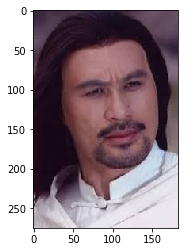

image loaded

Face has been detected



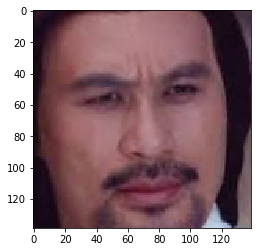


This face has been recognized as: JasonMomoa with prob 0.274911
Identity: JasonMomoa, Prob 0.274911
Identity: JohnnyDepp, Prob 0.211384
Identity: PatrickWilson, Prob 0.183286
Identity: RyanReynolds, Prob 0.178410
Identity: WillemDafoe, Prob 0.152009
Now search for the most similar Faces
displaying the top 3 ...


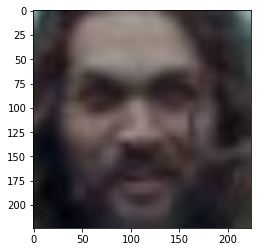

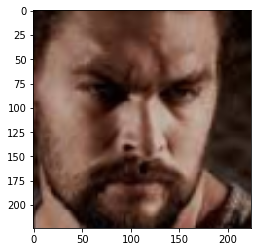

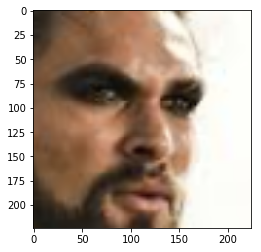

In [31]:
myFaceRecog.predict_image_single_face('/Users/fanyang/Documents/tensorflow_file/facedetection/xujinliang/images (2).jpg')

In [ ]:
a = [('ben_afflek', 0.18225162858093638), ('elton_john', 0.1936616581943029), ('jerry_seinfeld', 0.22845867649946297), ('madonna', 0.23481586837286098), ('mindy_kaling', 0.16081216835243667)]

In [ ]:
max(a, key = lambda x:x[1])

In [ ]:
max(a)

In [ ]:
min(a)

In [ ]:
type(a)

In [ ]:
  test_image = cv.imread()